# Linear Regression

<!-- ![Linear regression image](https://production-media.paperswithcode.com/methods/2560px-Linear_regression.svg_wwqz1f3.png) -->

<img src="https://production-media.paperswithcode.com/methods/2560px-Linear_regression.svg_wwqz1f3.png" alt="drawing" width="1000"/>

![ML System](ML_System.drawio.png)


https://github.com/42-AI/bootcamp_machine-learning

In [ ]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import random

# %matplotlib notebook
%matplotlib widget
# %matplotlib inline


MIN_VALUE = 0
MAX_VALUE = 1
NB_ELEMENTS = 100

x = np.linspace(MIN_VALUE, MAX_VALUE, NB_ELEMENTS)
COEF_A_MIN = 0
COEF_A_MAX = 5

COEF_B_MIN = 0
COEF_B_MAX = 5

COEF_A = (random.random() - COEF_A_MIN) * COEF_A_MAX
COEF_B = (random.random() - COEF_B_MIN) * COEF_B_MAX
random_noise = np.random.random(NB_ELEMENTS) * MAX_VALUE * 2
random_noise -= random_noise.mean()
# y = (a * x) + b
# plt.scatter(x, y)
y = (COEF_A * x) + COEF_B + random_noise

print(f"{x.shape = }")
print(f"{y.shape = }")
print(f"{COEF_A = }")
print(f"{COEF_B = }")

x.shape = (100,)
y.shape = (100,)
COEF_A = 0.9146815486949261
COEF_B = 2.894029996332786


# Data

$m$ is the number of examples

$n$ is the number of dimensions / features

# X can have multiple features

$$
X^{(m)}_n
$$

# Y only has one dimension

$$
Y^{(m)}
$$

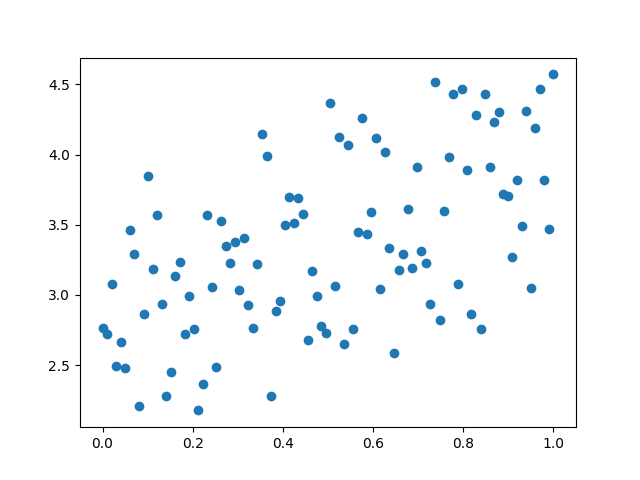

In [ ]:
plt.scatter(x, y)

# Predict

A simple formula:
$$
\hat{y} = ax + b
$$

That we can genralize to multiple dimensions with Thetas:
$$
\hat{y} = θ_0 \cdot x + θ_1
$$

# Cost

For each prediction we will measure the difference between the prediction and the true value
$$
\text{Cost}^{(i)} = (\hat{y}^{(i)} - y^{(i)})
$$

And we will apply it to our complete dataset and keep the mean

$$
\text{Cost} = \frac{\sum_{i=0}^{m}{(\hat{y}^{(i)} - y^{(i)})}}{m}
$$

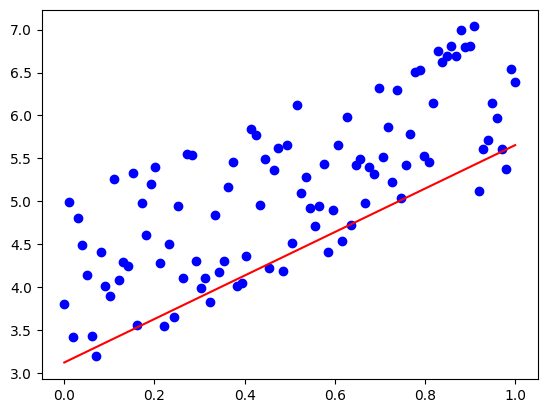

In [ ]:
def predict(x, thetas):
    a, b = thetas
    y_hat = a * x + b
    return y_hat


def get_cost(y, y_hat):
    return ((y - y_hat) ** 2).sum()


def plot_linear_regression(x, y, thetas, show_errors=False):
    plt.scatter(x, y, c="b")
    y_hat = predict(x, thetas)
    error = get_cost(y, y_hat)
    plt.plot(x, y_hat, c="r")
    if show_errors:
        for x_element, y_element, y_hat_element in zip(x, y, y_hat):
            plt.plot((x_element, x_element), (y_element, y_hat_element), ":y")
    # ax_2d.title(f"Error = {error}")
    return error

a = (random.random() - COEF_A_MIN) * COEF_A_MAX
b = (random.random() - COEF_B_MIN) * COEF_B_MAX
thetas = np.array((a, b))
cost = plot_linear_regression(x, y, thetas, show_errors=False)

We can use our cost formula to get see how good our linear regression

cost = 94.7099980128211


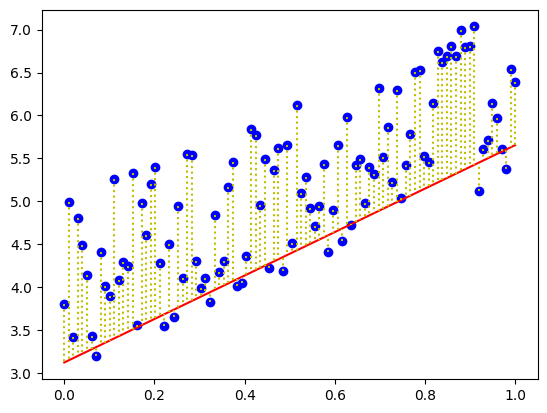

In [ ]:
cost = plot_linear_regression(x, y, thetas, show_errors=True)
print(f"{cost = }")

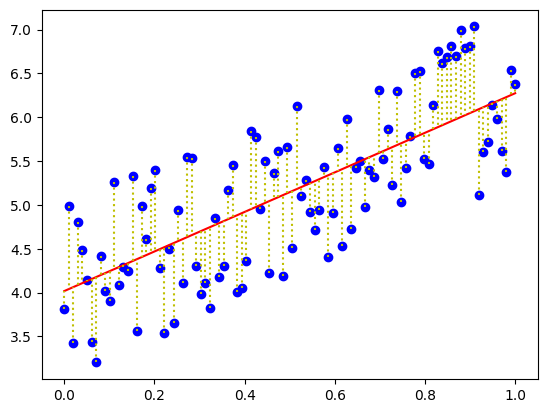

In [ ]:
cost = plot_linear_regression(x, y, (COEF_A, COEF_B), show_errors=True)


/tmp/ipykernel_281370/3793215584.py:24: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax_3d.scatter(


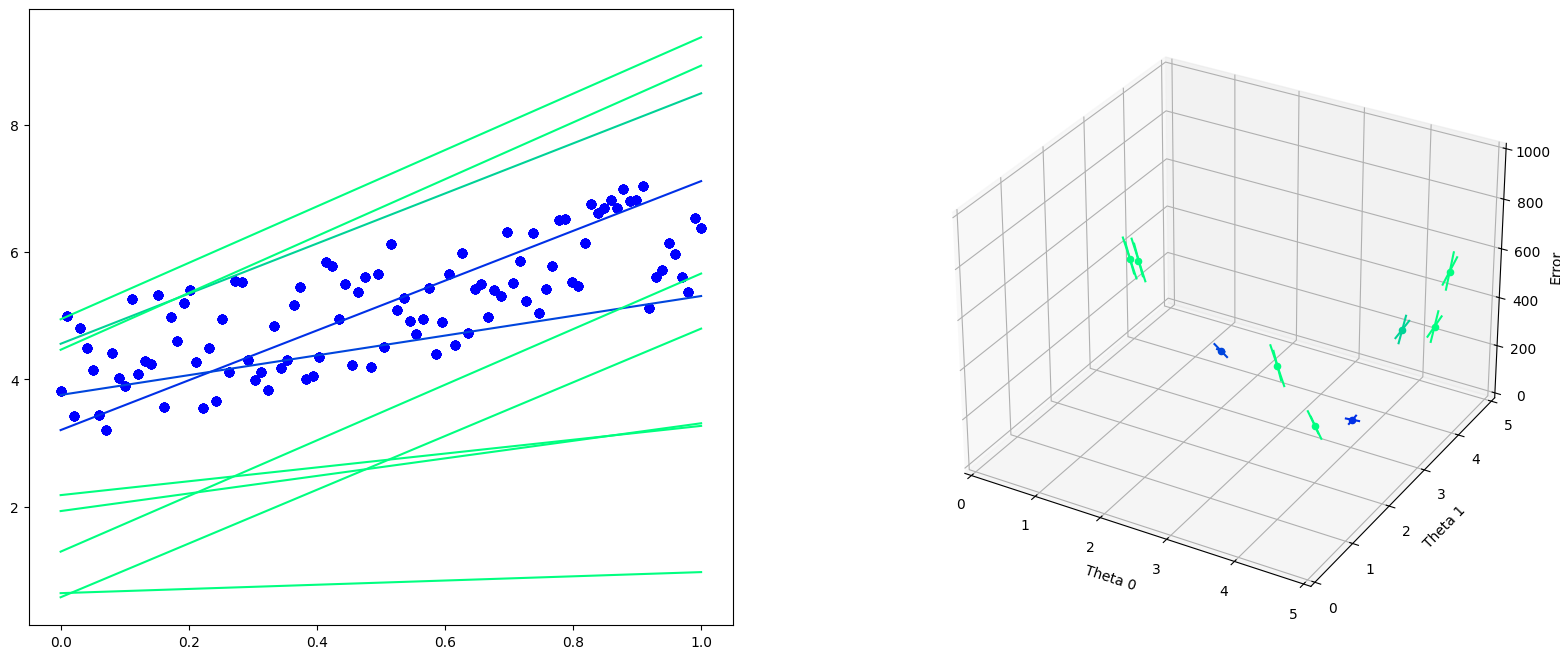

In [ ]:
fig = plt.figure(figsize=(20, 8))
# fig.suptitle("A tale of 2 subplots")
ax_2d = fig.add_subplot(1, 2, 1)
ax_3d = fig.add_subplot(1, 2, 2, projection="3d")
cmap = plt.get_cmap("winter")
MAX_ERROR = 300

def plot_linear_regression(x, y, thetas, show_errors=False):
    ax_2d.scatter(x, y, c="b")
    y_hat = predict(x, thetas)
    cost = get_cost(y, y_hat)
    ax_2d.plot(x, y_hat, c=cmap(cost / 300))
    if show_errors:
        for x_element, y_element, y_hat_element in zip(x, y, y_hat):
            plt.plot(
                (x_element, x_element), 
                (y_element, y_hat_element), 
                ":y"
            )
    # ax_2d.title(f"Error = {error}")
    return cost

def plot_cost(cost, thetas, x, y):
    ax_3d.scatter(
        thetas[0],
        thetas[1],
        zs=cost,
        c=cmap(cost / 300),
        # zdir="z",
        # c=c_list,
        label=f"θ({thetas[0]:.2f}, {thetas[1]:.2f}) cost={int(cost)}",
    )
    epsilon = 1e-1
    thetas_a = thetas.copy() - epsilon
    thetas_b = thetas.copy() + epsilon
    y_hat_a = predict(x, thetas_a)
    cost_a = get_cost(y, y_hat_a)
    y_hat_b = predict(x, thetas_b)
    cost_b = get_cost(y, y_hat_b)
    ax_3d.plot(
        (thetas_a[0], thetas_b[0]),
        (thetas[1], thetas[1]),
        (cost_a, cost_b),
        c=cmap(cost / 300),
	)
    ax_3d.plot(
        (thetas[0], thetas[0]),
        (thetas_a[1], thetas_b[1]),
        (cost_a, cost_b),
        c=cmap(cost / 300),
	)
    # ax_3d.legend()
    ax_3d.set_xlim(COEF_A_MIN, COEF_A_MAX)
    ax_3d.set_ylim(COEF_B_MIN, COEF_B_MAX)
    ax_3d.set_zlim(0, 1000)
    ax_3d.set_xlabel("Theta 0")
    ax_3d.set_ylabel("Theta 1")
    ax_3d.set_zlabel("Error")


for _ in range(10):
    a = (random.random() - COEF_A_MIN) * COEF_A_MAX
    b = (random.random() - COEF_B_MIN) * COEF_B_MAX
    thetas = np.array((a, b))
    cost = plot_linear_regression(x, y, thetas)
    plot_cost(cost, thetas, x, y)

In [ ]:
a = (random.random() - COEF_A_MIN) * COEF_A_MAX
b = (random.random() - COEF_B_MIN) * COEF_B_MAX
thetas = np.array([a, b])

print(f"{thetas = }")
print(f"{COEF_A, COEF_B = }")

thetas = array([4.26464277, 1.72111595])
COEF_A, COEF_B = (2.257503643480115, 4.0168367524381505)


In [ ]:
def add_intercept(x):
    vec_one = np.ones(x.shape[0])
    result = np.column_stack((x, vec_one))
    return result


def gradient(x, y, thetas):
    X = add_intercept(x)
    m = X.shape[0]
    gradient = 2 * (X.T @ ((X @ thetas) - y)) / m
    return gradient

gradient(x, y, thetas)

array([-0.97550799, -2.58430247])

In [ ]:
def derivate(x, y, a, b):
	n = y.shape[0]
	da = 2*x*(a*x+b-y)/n
	db = 2*(a*x+b-y)/n
	return da.sum(), db.sum()

derivate(x, y, thetas[0], thetas[1])

(-0.9755079863870016, -2.584302469340614)

In [ ]:
print(f"{COEF_A = :.3f}")
print(f"{COEF_B = :.3f}")

alpha = 1e-1

for i in range(int(1e3)):
    a, b  = thetas
    if i % 10 == 0:
        print(f"{a = :.3f} {b = :.3f}")
    d_thetas = gradient(x, y, thetas)
    thetas = thetas - (alpha * d_thetas)


COEF_A = 2.258
COEF_B = 4.017
a = 4.265 b = 1.721
a = 4.448 b = 2.782
a = 4.212 b = 2.971
a = 3.985 b = 3.096
a = 3.785 b = 3.203
a = 3.610 b = 3.297
a = 3.458 b = 3.379
a = 3.324 b = 3.450
a = 3.208 b = 3.513
a = 3.106 b = 3.567
a = 3.017 b = 3.615
a = 2.940 b = 3.656
a = 2.872 b = 3.693
a = 2.813 b = 3.725
a = 2.761 b = 3.752
a = 2.716 b = 3.777
a = 2.676 b = 3.798
a = 2.641 b = 3.816
a = 2.611 b = 3.832
a = 2.585 b = 3.847
a = 2.562 b = 3.859
a = 2.542 b = 3.870
a = 2.524 b = 3.879
a = 2.509 b = 3.887
a = 2.495 b = 3.895
a = 2.484 b = 3.901
a = 2.473 b = 3.906
a = 2.464 b = 3.911
a = 2.457 b = 3.915
a = 2.450 b = 3.919
a = 2.444 b = 3.922
a = 2.439 b = 3.925
a = 2.434 b = 3.927
a = 2.430 b = 3.930
a = 2.426 b = 3.931
a = 2.423 b = 3.933
a = 2.421 b = 3.935
a = 2.418 b = 3.936
a = 2.416 b = 3.937
a = 2.415 b = 3.938
a = 2.413 b = 3.939
a = 2.412 b = 3.939
a = 2.411 b = 3.940
a = 2.410 b = 3.941
a = 2.409 b = 3.941
a = 2.408 b = 3.941
a = 2.407 b = 3.942
a = 2.407 b = 3.942
a = 2.406 

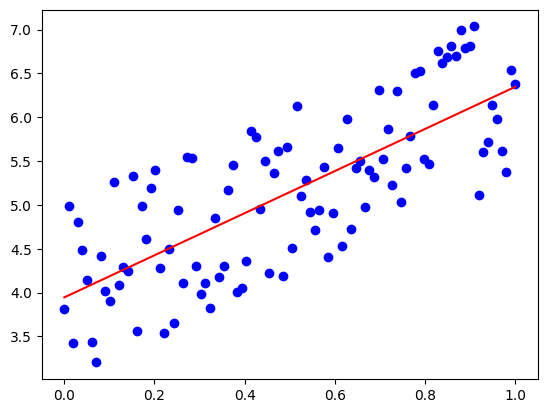

In [ ]:
def plot_linear_regression(x, y, thetas, show_errors=False):
    plt.scatter(x, y, c="b")
    y_hat = predict(x, thetas)
    error = get_cost(y, y_hat)
    plt.plot(x, y_hat, c="r")
    if show_errors:
        for x_element, y_element, y_hat_element in zip(x, y, y_hat):
            plt.plot((x_element, x_element), (y_element, y_hat_element), ":y")
    # ax_2d.title(f"Error = {error}")
    return error

cost = plot_linear_regression(x, y, thetas, show_errors=False)

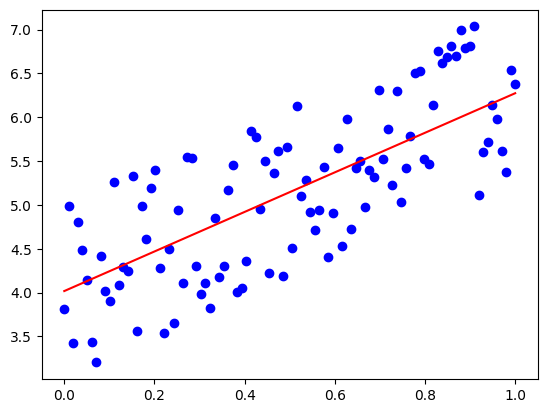

In [ ]:
cost = plot_linear_regression(x, y, np.array([COEF_A, COEF_B]), show_errors=False)